In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

In [2]:
data = pd.read_csv(r'C:\Users\Rohit Kr\Desktop\machine Learning\Fashion project\styless.csv')
data
# "C:\Users\Rohit Kr\Desktop\machine Learning\fashion_products.csv"

id gender masterCategory subCategory            articleType  \
0      15970    Men        Apparel     Topwear                 Shirts   
1      39386    Men        Apparel  Bottomwear                  Jeans   
2      59263  Women    Accessories     Watches                Watches   
3      21379    Men        Apparel  Bottomwear            Track Pants   
4      53759    Men        Apparel     Topwear                Tshirts   
...      ...    ...            ...         ...                    ...   
44440  17036    Men       Footwear       Shoes           Casual Shoes   
44441   6461    Men       Footwear  Flip Flops             Flip Flops   
44442  18842    Men        Apparel     Topwear                Tshirts   
44443  46694  Women  Personal Care   Fragrance  Perfume and Body Mist   
44444  51623  Women    Accessories     Watches                Watches   

      baseColour  season    year   usage  \
0      Navy Blue    Fall  2011.0  Casual   
1           Blue  Summer  2012.0  Casual   
2         Silver  Winter  2016.0  Casual   
3          Black    Fall  2011.0  Casual   
4           Grey  Summer  2012.0  Casual   
...          ...     ...     ...     ...   
44440      White  Summer  2013.0  Casual   
44441        Red  Summer  2011.0  Casual   
44442       Blue    Fall  2011.0  Casual   
44443       Blue  Spring  2017.0  Casual   
44444       Pink  Winter  2016.0  Casual   

                                    productDisplayName Unnamed: 10 Unnamed: 11  
0                     Turtle Check Men Navy Blue Shirt         NaN         NaN  
1                   Peter England Men Party Blue Jeans         NaN         NaN  
2                             Titan Women Silver Watch         NaN         NaN  
3        Manchester United Men Solid Black Track Pants         NaN         NaN  
4                                Puma Men Grey T-shirt         NaN         NaN  
...                                                ...         ...         ...  
44440                        Gas Men Caddy Casual Shoe         NaN         NaN  
44441               Lotto Men's Soccer Track Flip Flop         NaN         NaN  
44442             Puma Men Graphic Stellar Blue Tshirt         NaN         NaN  
44443                   Rasasi Women Blue Lady Perfume         NaN         NaN  
44444  Fossil Women Pink Dial Chronograph Watch ES3050         NaN         NaN  

[44445 rows x 12 columns]

In [3]:
data.shape

(44445, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44445 entries, 0 to 44444
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44445 non-null  int64  
 1   gender              44445 non-null  object 
 2   masterCategory      44445 non-null  object 
 3   subCategory         44445 non-null  object 
 4   articleType         44445 non-null  object 
 5   baseColour          44430 non-null  object 
 6   season              44424 non-null  object 
 7   year                44444 non-null  float64
 8   usage               44128 non-null  object 
 9   productDisplayName  44438 non-null  object 
 10  Unnamed: 10         21 non-null     object 
 11  Unnamed: 11         2 non-null      object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.1+ MB


In [5]:
data.describe()

id          year
count  44445.000000  44444.000000
mean   29692.307976   2012.805846
std    17048.290461      2.126332
min     1163.000000   2007.000000
25%    14770.000000   2011.000000
50%    28609.000000   2012.000000
75%    44679.000000   2015.000000
max    60000.000000   2019.000000

In [6]:
# Summary statistics for categorical columns
data.describe(include='object')

gender masterCategory subCategory articleType baseColour  season  \
count   44445          44445       44445       44445      44430   44424   
unique      5              7          45         143         46       4   
top       Men        Apparel     Topwear     Tshirts      Black  Summer   
freq    22164          21400       15405        7070       9732   21476   

         usage            productDisplayName  \
count    44128                         44438   
unique       8                         31135   
top     Casual  Lucera Women Silver Earrings   
freq     34413                            82   

                                  Unnamed: 10      Unnamed: 11  
count                                      21                2  
unique                                      8                2  
top      Cufflink and Pocket Square Combo Set  Love Flip-flops  
freq                                       14                1

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing Values:\n{missing_values}")

Missing Values:
id                        0
gender                    0
masterCategory            0
subCategory               0
articleType               0
baseColour               15
season                   21
year                      1
usage                   317
productDisplayName        7
Unnamed: 10           44424
Unnamed: 11           44443
dtype: int64


In [8]:
# Drop columns with all missing values if not needed
data = data.drop(columns=['Unnamed: 10', 'Unnamed: 11'])
data

id gender masterCategory subCategory            articleType  \
0      15970    Men        Apparel     Topwear                 Shirts   
1      39386    Men        Apparel  Bottomwear                  Jeans   
2      59263  Women    Accessories     Watches                Watches   
3      21379    Men        Apparel  Bottomwear            Track Pants   
4      53759    Men        Apparel     Topwear                Tshirts   
...      ...    ...            ...         ...                    ...   
44440  17036    Men       Footwear       Shoes           Casual Shoes   
44441   6461    Men       Footwear  Flip Flops             Flip Flops   
44442  18842    Men        Apparel     Topwear                Tshirts   
44443  46694  Women  Personal Care   Fragrance  Perfume and Body Mist   
44444  51623  Women    Accessories     Watches                Watches   

      baseColour  season    year   usage  \
0      Navy Blue    Fall  2011.0  Casual   
1           Blue  Summer  2012.0  Casual   
2         Silver  Winter  2016.0  Casual   
3          Black    Fall  2011.0  Casual   
4           Grey  Summer  2012.0  Casual   
...          ...     ...     ...     ...   
44440      White  Summer  2013.0  Casual   
44441        Red  Summer  2011.0  Casual   
44442       Blue    Fall  2011.0  Casual   
44443       Blue  Spring  2017.0  Casual   
44444       Pink  Winter  2016.0  Casual   

                                    productDisplayName  
0                     Turtle Check Men Navy Blue Shirt  
1                   Peter England Men Party Blue Jeans  
2                             Titan Women Silver Watch  
3        Manchester United Men Solid Black Track Pants  
4                                Puma Men Grey T-shirt  
...                                                ...  
44440                        Gas Men Caddy Casual Shoe  
44441               Lotto Men's Soccer Track Flip Flop  
44442             Puma Men Graphic Stellar Blue Tshirt  
44443                   Rasasi Women Blue Lady Perfume  
44444  Fossil Women Pink Dial Chronograph Watch ES3050  

[44445 rows x 10 columns]

 # Data Cleaning

In [9]:
# Example: Fill missing values with mode for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Example: Fill missing values with median for numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns
for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)
missing_values = data.isnull().sum()
missing_values

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

# Handle Duplicates
- ***Check and remove any duplicate rows if necessary.***

In [10]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
data = data.drop_duplicates()


Number of duplicate rows: 0


# Data Types Conversion
- ***Ensure that data types are appropriate for analysis, converting columns if necessary.***

In [11]:
# Convert columns to appropriate data types if necessary
data['year'] = data['year'].astype(int)  

# Univariate Analysis
- ***Analyze each feature individually. Visualize the distribution of both numerical and categorical features.***

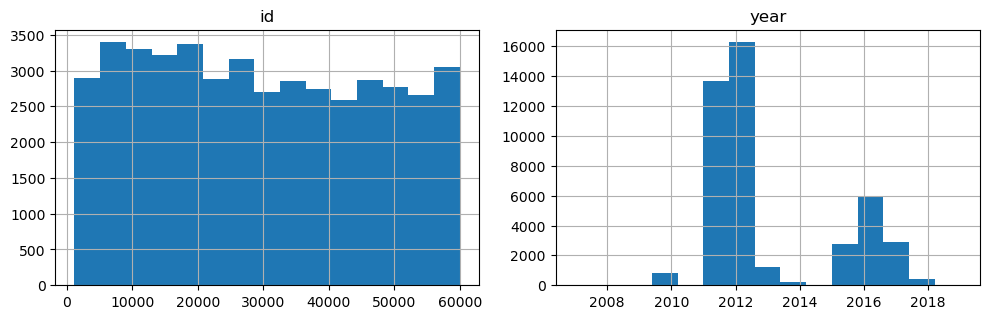

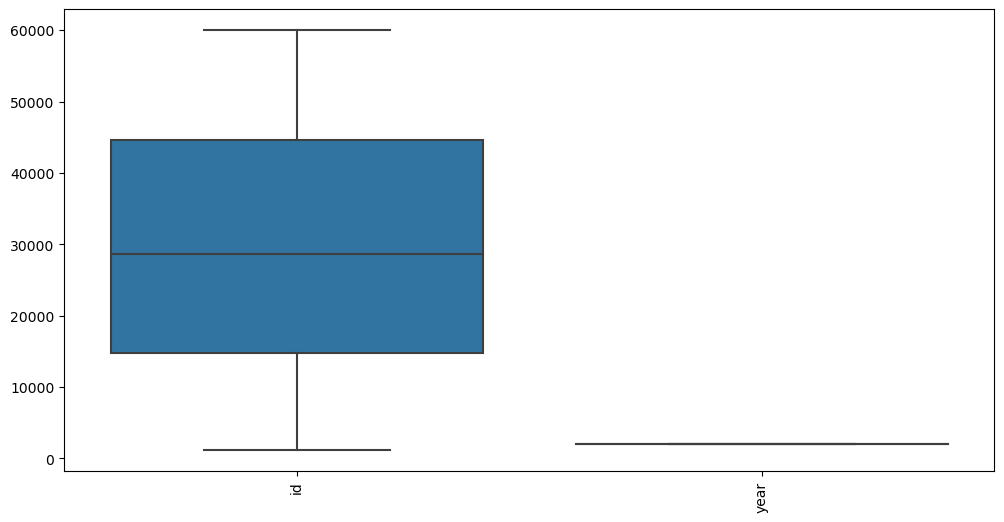

In [12]:
# Plot histograms for numerical columns
data[numerical_columns].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.tight_layout()
plt.show()

# Plot boxplots for numerical columns to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_columns])
plt.xticks(rotation=90)
plt.show()


# Categorical Data Analysis
- ***Analyze the distribution of categorical features such as gender, masterCategory, subCategory, articleType, etc.***
- ***Use bar plots to visualize the counts of different categories***

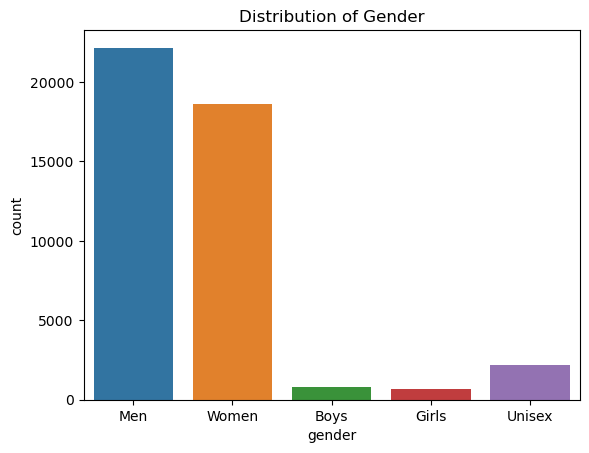

In [13]:
# Distribution of gender
sns.countplot(x='gender', data=data)
plt.title('Distribution of Gender')
plt.show()

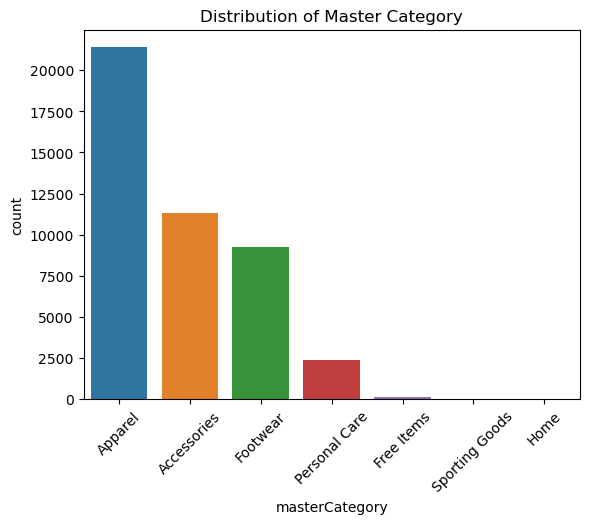

In [14]:
# Distribution of masterCategory
sns.countplot(x='masterCategory', data=data)
plt.title('Distribution of Master Category')
plt.xticks(rotation=45)
plt.show()

# Numerical Data Analysis
- ***Check the distribution of numerical features such as year.***
- ***Use histograms or box plots to visualize these distributions.***

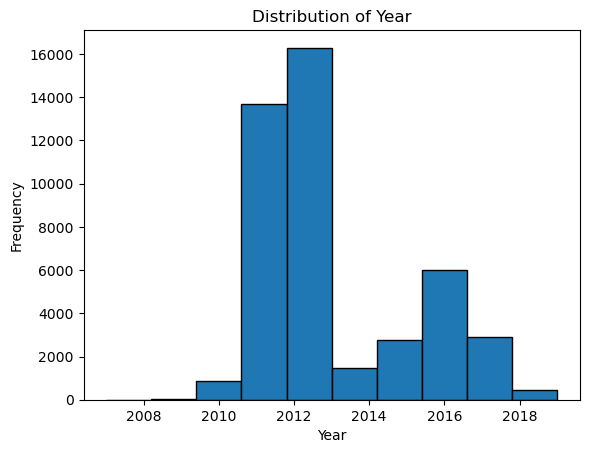

In [15]:
# Distribution of year
plt.hist(data['year'].dropna(), bins=10, edgecolor='black')
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


# Correlations and Relationships
- ***Explore relationships between different features. For example, check how masterCategory relates to subCategory.***
- ***Use cross-tabulations or group by operations to understand these relationships.***

subCategory     Accessories  Apparel Set  Bags  Bath and Body  \
masterCategory                                                  
Accessories             143            0  3055              0   
Apparel                   0          106     0              0   
Footwear                  0            0     0              0   
Free Items                0            0     0              0   
Home                      0            0     0              0   
Personal Care             0            0     0             12   
Sporting Goods            0            0     0              0   

subCategory     Beauty Accessories  Belts  Bottomwear  Cufflinks  Dress  Eyes  \
masterCategory                                                                  
Accessories                      0    811           0        108      0     0   
Apparel                          0      0        2694          0    478     0   
Footwear                         0      0           0          0      0     0   
Free Item

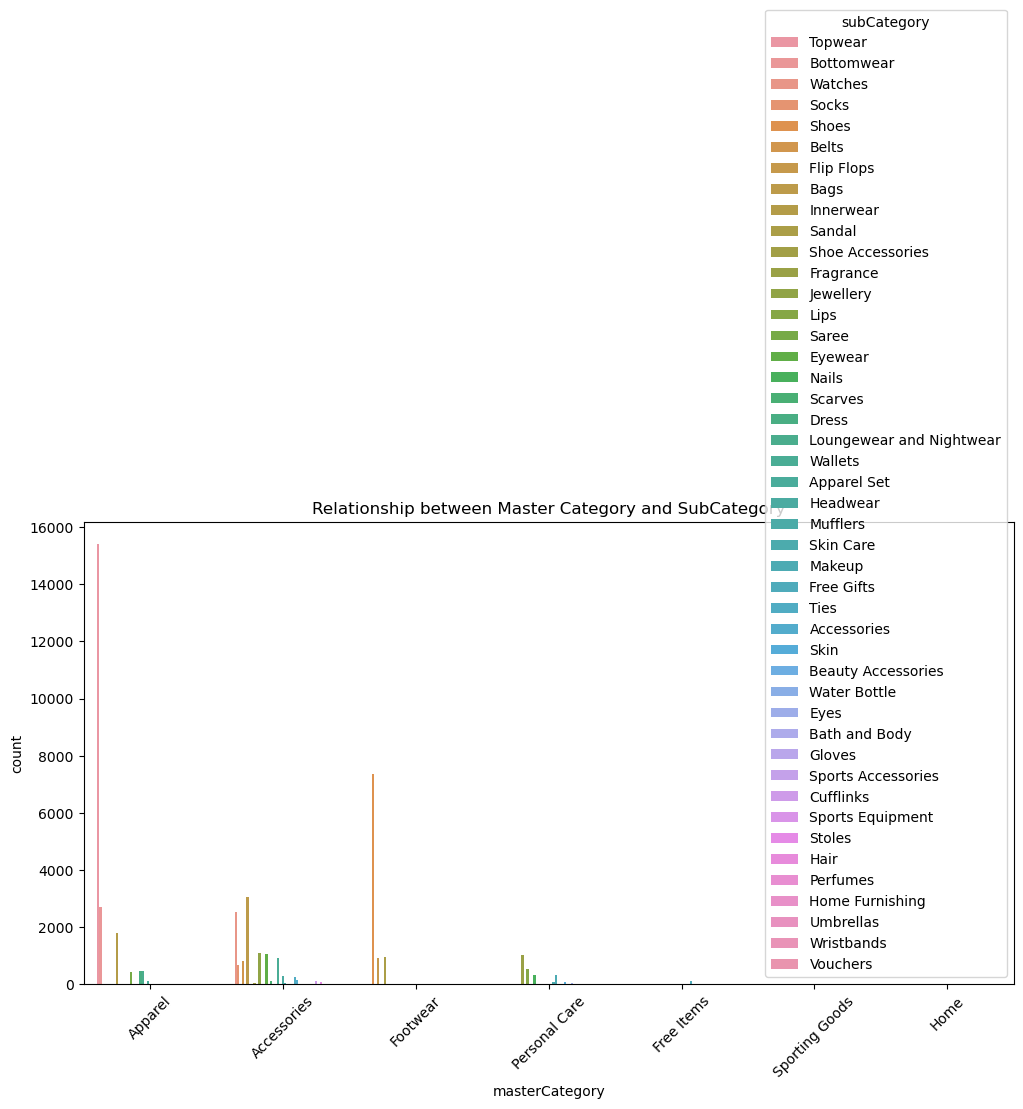

In [16]:
# Relationship between masterCategory and subCategory
category_relationship = pd.crosstab(data['masterCategory'], data['subCategory'])
print(category_relationship)

# Plot the relationship between masterCategory and subCategory
plt.figure(figsize=(12, 6))  # Increase the figure size
sns.countplot(x='masterCategory', hue='subCategory', data=data)
plt.title('Relationship between Master Category and SubCategory')
plt.xticks(rotation=45)
plt.show()

# Seasonal Trends
- ***Investigate if there are any trends or patterns related to season.***
- ***Analyze how different categories or products are distributed across different seasons.***

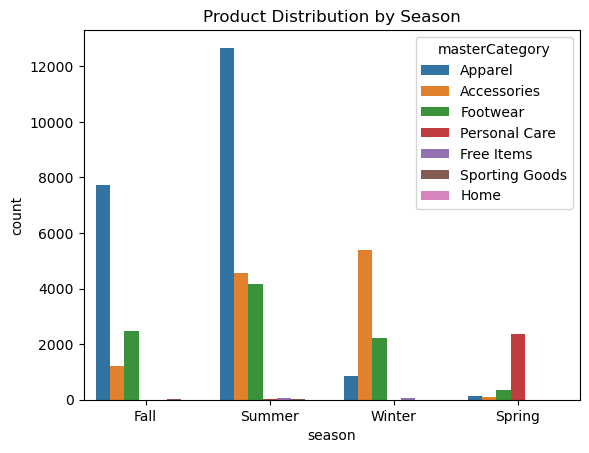

In [17]:
# Distribution of products by season
sns.countplot(x='season', hue='masterCategory', data=data)
plt.title('Product Distribution by Season')
plt.show()

# Outliers Detection
- ***Use box plots to detect any outliers in numerical features.***
- ***Outliers can affect model performance, so it's crucial to handle them appropriately.***

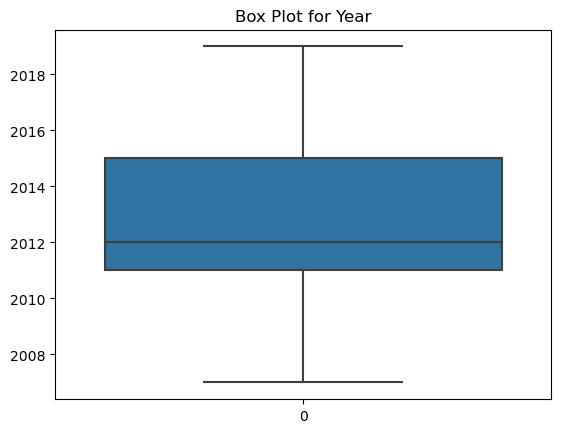

In [18]:
# Box plot for the 'year' feature
sns.boxplot(data['year'].dropna())
plt.title('Box Plot for Year')
plt.show()


# Visualizing the Product Titles
- ***Analyzing the frequency of words in productDisplayName can give insights into popular brands or styles.***
- ***Use word clouds or bar plots to visualize these insights.***

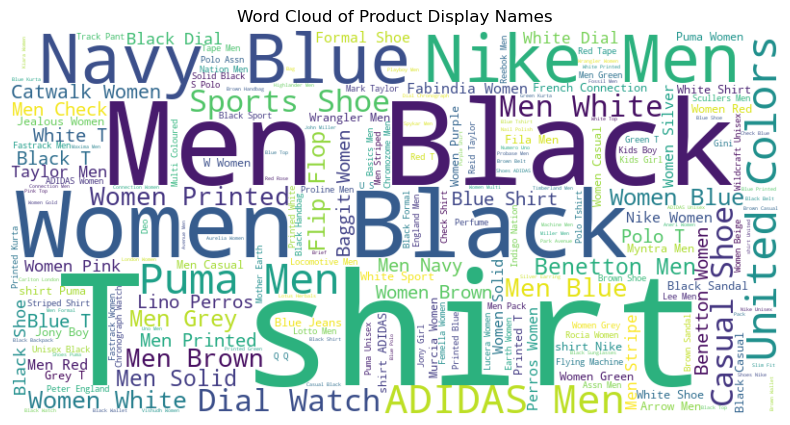

In [19]:
# Generate a word cloud for productDisplayName
text = ' '.join(data['productDisplayName'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Display Names')
plt.show()


In [20]:
#  Encoding Categorical Variables
# One-hot encoding for categorical columns
data_encoded = pd.get_dummies(data, columns=['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage'])

# Check the encoded data
print(data_encoded.head())


      id  year                             productDisplayName  gender_Boys  \
0  15970  2011               Turtle Check Men Navy Blue Shirt            0   
1  39386  2012             Peter England Men Party Blue Jeans            0   
2  59263  2016                       Titan Women Silver Watch            0   
3  21379  2011  Manchester United Men Solid Black Track Pants            0   
4  53759  2012                          Puma Men Grey T-shirt            0   

   gender_Girls  gender_Men  gender_Unisex  gender_Women  \
0             0           1              0             0   
1             0           1              0             0   
2             0           0              0             1   
3             0           1              0             0   
4             0           1              0             0   

   masterCategory_Accessories  masterCategory_Apparel  ...  season_Summer  \
0                           0                       1  ...              0   
1               

# Feature Selection



In [21]:
# Assuming 'masterCategory' is now one-hot encoded, we'll use those columns
# Create a list of target columns related to 'masterCategory'
target_columns = [col for col in data_encoded.columns if 'masterCategory_' in col]

# Extract features (excluding target columns and identifiers)
features = data_encoded.drop(['id', 'productDisplayName'] + target_columns, axis=1)

# If using one-hot encoded target, choose the relevant one-hot encoded column
# For example, assuming you want to predict if a product is 'Apparel'
target = data_encoded['masterCategory_Apparel']  # Adjust based on your target choice

print(f"Selected Features: {features.columns}")
print(f"Target Variable: {target.name}")



Selected Features: Index(['year', 'gender_Boys', 'gender_Girls', 'gender_Men', 'gender_Unisex',
       'gender_Women', 'subCategory_Accessories', 'subCategory_Apparel Set',
       'subCategory_Bags', 'subCategory_Bath and Body',
       ...
       'season_Summer', 'season_Winter', 'usage_Casual', 'usage_Ethnic',
       'usage_Formal', 'usage_Home', 'usage_Party', 'usage_Smart Casual',
       'usage_Sports', 'usage_Travel'],
      dtype='object', length=252)
Target Variable: masterCategory_Apparel


# Splitting the Data

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (35556, 252)
Testing data shape: (8889, 252)


#  Decision Tree Classifier

In [23]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_dt)}")

Decision Tree Classifier
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4597
           1       1.00      1.00      1.00      4292

    accuracy                           1.00      8889
   macro avg       1.00      1.00      1.00      8889
weighted avg       1.00      1.00      1.00      8889



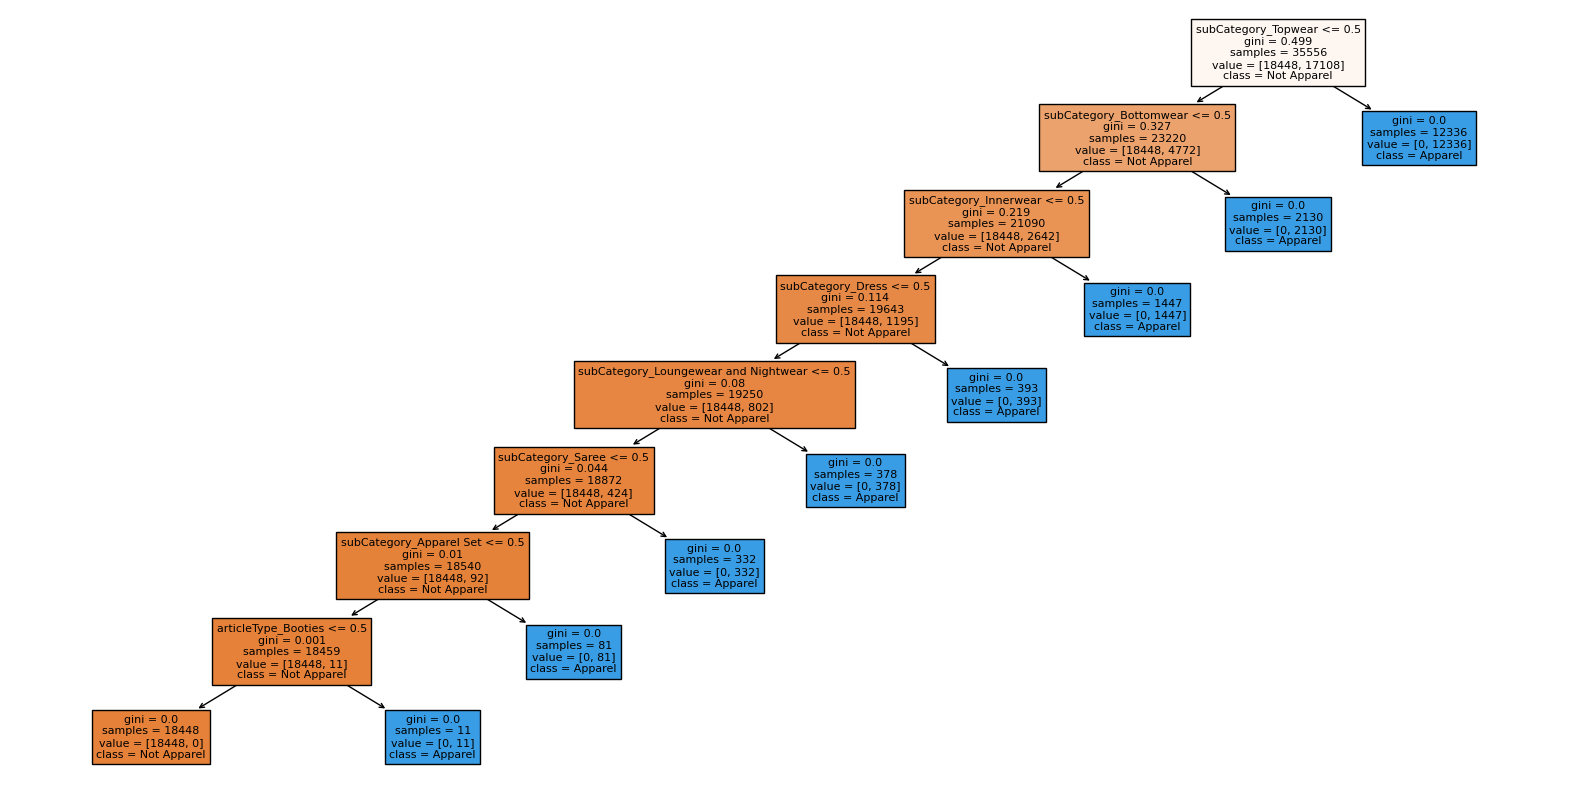

In [24]:
# Plot the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X_train.columns, class_names=['Not Apparel', 'Apparel'], filled=True)
plt.show()

#  Random Forest Classifier

In [25]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_rf)}")



Random Forest Classifier
Accuracy: 0.9997750028124649
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4597
           1       1.00      1.00      1.00      4292

    accuracy                           1.00      8889
   macro avg       1.00      1.00      1.00      8889
weighted avg       1.00      1.00      1.00      8889



# Interactive Visualization

In [26]:
# Create a DataFrame for Plotly
# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Optionally, select only the top 20 features
num_top_features = 20
top_indices = indices[:num_top_features]
top_features = X_train.columns[top_indices]
top_importances = importances[top_indices]


df_importances = pd.DataFrame({
    'Feature': X_train.columns[indices][:num_top_features],
    'Importance': top_importances
})

# Interactive bar chart
fig = px.bar(df_importances, x='Importance', y='Feature', orientation='h',
             title='Top Feature Importances in Random Forest',
             labels={'Importance': 'Feature Importance', 'Feature': 'Features'},
             text='Importance')

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(yaxis=dict(title='Features', tickmode='linear'))
fig.show()


# Support Vector Machine (SVM) Classifier

In [27]:
# Scale the features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
print("\nSupport Vector Machine Classifier")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_svm)}")



Support Vector Machine Classifier
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4597
           1       1.00      1.00      1.00      4292

    accuracy                           1.00      8889
   macro avg       1.00      1.00      1.00      8889
weighted avg       1.00      1.00      1.00      8889



# Enhanced Feature Coefficients Visualization

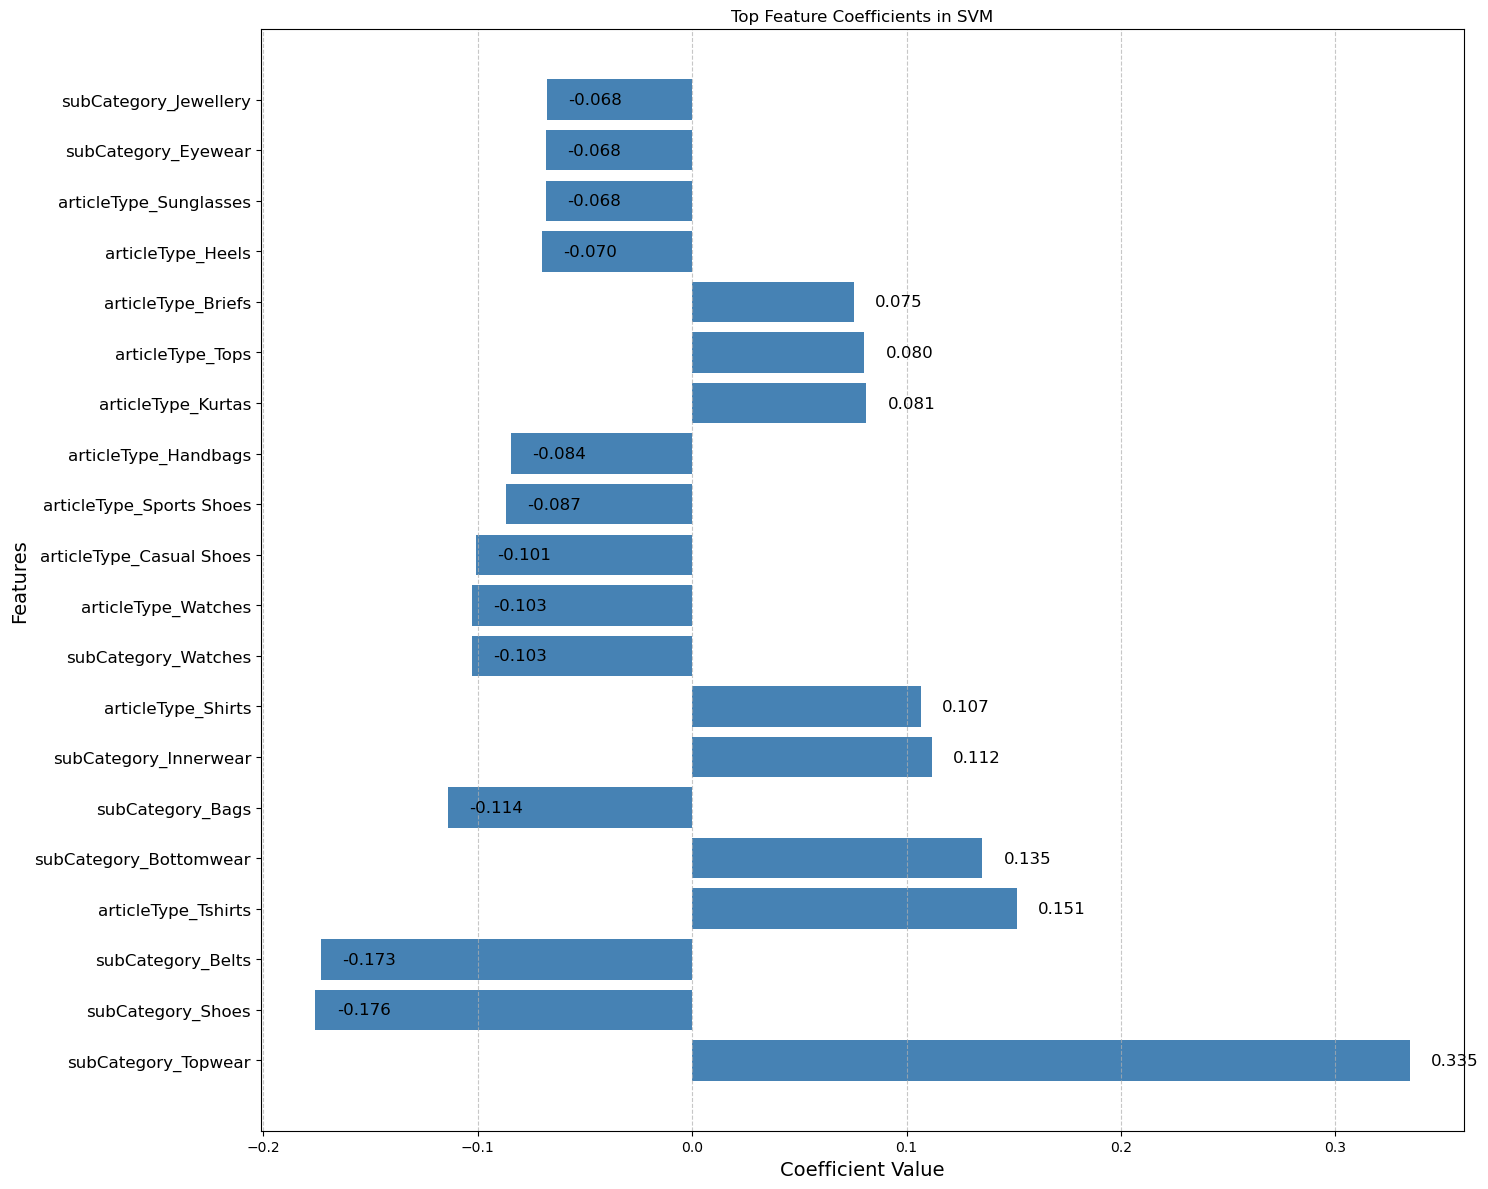

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature coefficients
coefficients = svm_model.coef_.flatten()
indices = np.argsort(np.abs(coefficients))[::-1]  # Sort by absolute value for better visualization

# Optionally, select only the top 20 features
num_top_features = 20
top_indices = indices[:num_top_features]
top_features = X_train.columns[top_indices]
top_coefficients = coefficients[top_indices]

# Create a larger figure
plt.figure(figsize=(15, 12))

# Plot the feature coefficients as horizontal bars
plt.title("Top Feature Coefficients in SVM")
bars = plt.barh(range(num_top_features), top_coefficients, align="center", color='steelblue')
plt.yticks(range(num_top_features), top_features, fontsize=12)
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Add annotations to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.3f}', va='center', ha='left', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


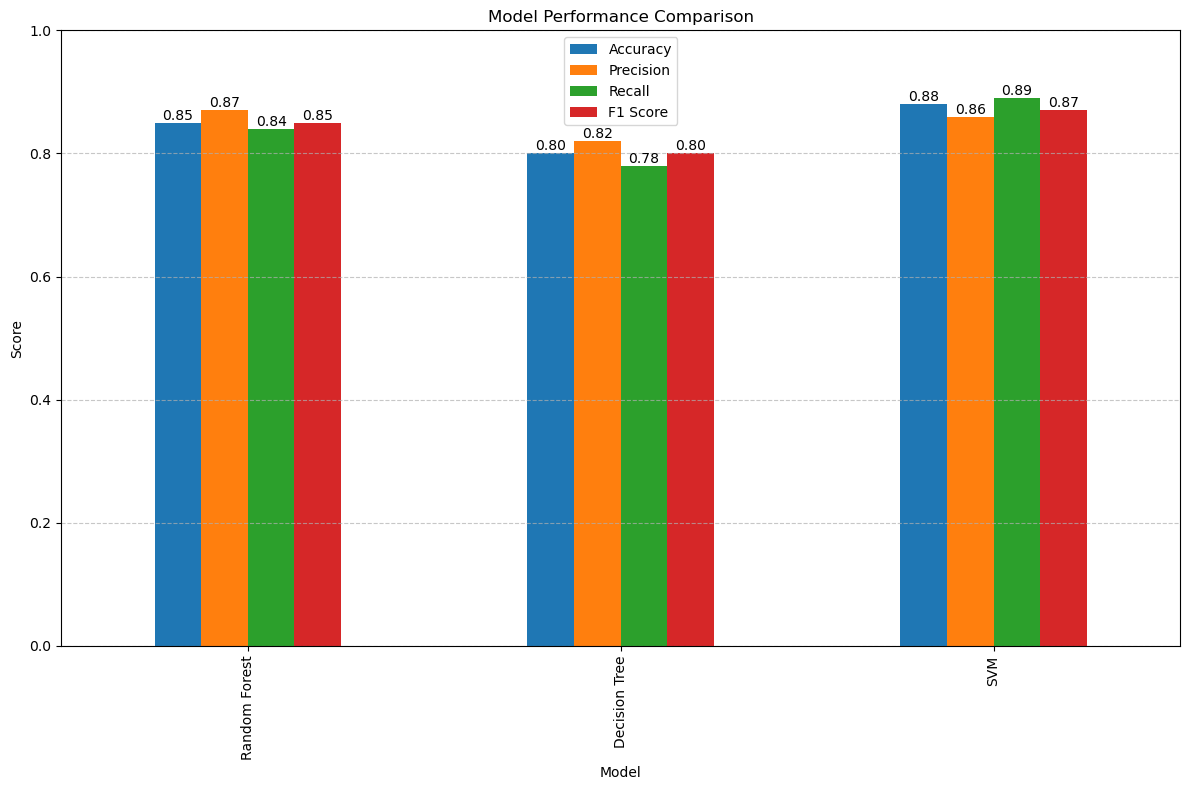

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Hypothetical results
metrics = {
    'Model': ['Random Forest', 'Decision Tree', 'SVM'],
    'Accuracy': [0.85, 0.80, 0.88],
    'Precision': [0.87, 0.82, 0.86],
    'Recall': [0.84, 0.78, 0.89],
    'F1 Score': [0.85, 0.80, 0.87]
}

# Create a DataFrame from the hypothetical results
df_metrics = pd.DataFrame(metrics)

# Set the Model column as the index for better plotting
df_metrics.set_index('Model', inplace=True)

# Plot the comparison for multiple metrics
ax = df_metrics.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)  # Metric scores range from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Annotate each bar with the corresponding value
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

# Display the plot
plt.show()


# Explanation
- **Accuracy**: Measures the overall correctness of the model. In this example, SVM has the highest accuracy.
- **Precision**: Indicates the percentage of true positive predictions among all positive predictions. Here, Random Forest has the highest precision.
- **Recall**: Measures the ability to capture all relevant instances (true positives). SVM has the highest recall, meaning it is best at identifying all positive cases.
- **F1 Score**: A balance between precision and recall. SVM also has the highest F1 Score, indicating a good balance.
# Interpretation
- ***SVM***: Shows the best overall performance with the highest accuracy (0.88), recall (0.89), and F1 score (0.87). It is likely the best model for cases where capturing as many relevant instances as possible (high recall) is important.
- ***Random Forest***: Has a slightly lower recall but good precision and F1 score. It might be a good choice when minimizing false positives is crucial.
- ***Decision Tree***: Shows the lowest performance in all metrics compared to the other two models, indicating it might not be as effective for this specific problem.

C:\Users\Rohit Kr\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning:

X has feature names, but SVC was fitted without feature names



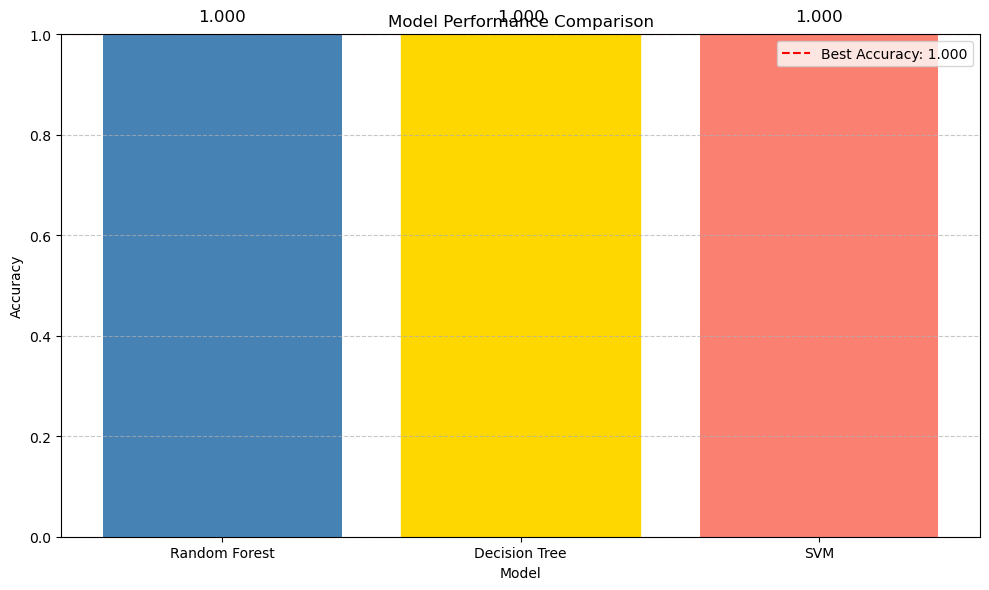

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model (assuming models are already trained and predictions are made)
# Example predictions
rf_predictions = rf_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Organize results into a DataFrame
metrics = {
    'Model': ['Random Forest', 'Decision Tree', 'SVM'],
    'Accuracy': [rf_accuracy, dt_accuracy, svm_accuracy]
}

df_metrics = pd.DataFrame(metrics)

# Determine the best-performing model
best_model_index = df_metrics['Accuracy'].idxmax()
best_model_name = df_metrics.loc[best_model_index, 'Model']
best_model_accuracy = df_metrics.loc[best_model_index, 'Accuracy']

# Plot the comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(df_metrics['Model'], df_metrics['Accuracy'], color=['steelblue', 'lightgreen', 'salmon'])
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1

# Add annotations and highlight the best-performing model
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.3f}', 
             ha='center', va='bottom', fontsize=12)
    if bar.get_x() + bar.get_width() / 2 == best_model_index:
        bar.set_color('gold')  # Highlight the best model

# Add a line to indicate the best accuracy
plt.axhline(y=best_model_accuracy, color='r', linestyle='--', label=f'Best Accuracy: {best_model_accuracy:.3f}')
plt.legend()

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
